# ⚖️ Trade-off entre Viés e Variância

Este notebook demonstra o equilíbrio necessário entre:
- **Viés**: erro sistemático por modelo muito simples (underfitting)
- **Variância**: sensibilidade excessiva aos dados de treino (overfitting)

Objetivo: encontrar um meio-termo que generalize bem.


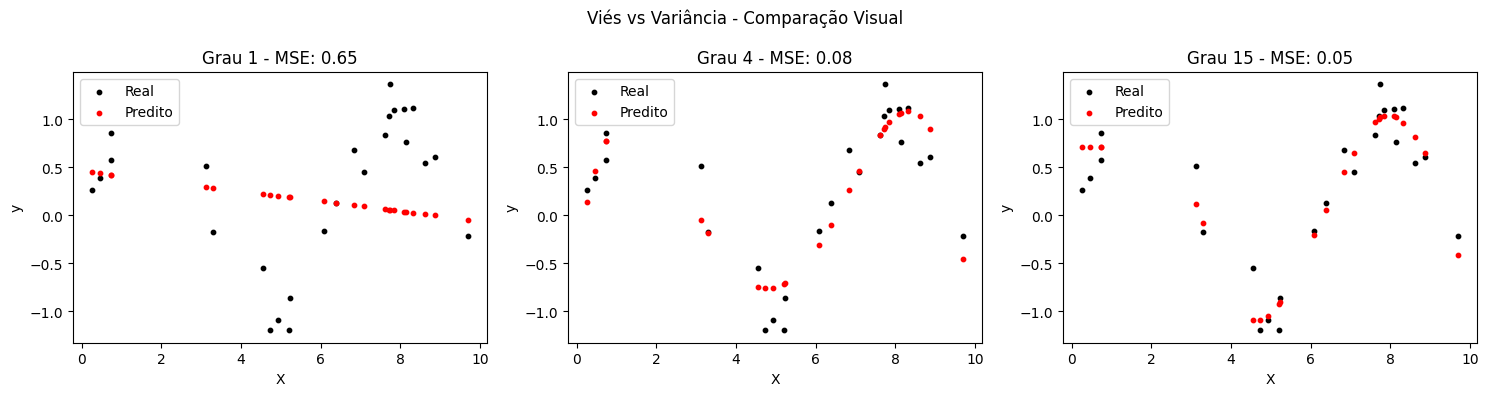

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Dados simulados
np.random.seed(42)
X = np.sort(np.random.rand(100, 1) * 10, axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Graus de complexidade
graus = [1, 4, 15]
plt.figure(figsize=(15, 4))

for i, grau in enumerate(graus):
    poly = PolynomialFeatures(degree=grau)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression().fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)

    plt.subplot(1, 3, i+1)
    plt.scatter(X_test, y_test, color='black', s=10, label='Real')
    plt.scatter(X_test, y_pred, color='red', s=10, label='Predito')
    plt.title(f"Grau {grau} - MSE: {mse:.2f}")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()

plt.suptitle("Viés vs Variância - Comparação Visual")
plt.tight_layout()
plt.show()


## ✅ Conclusões

- **Grau 1**: modelo com alto viés, não aprende a estrutura → *underfitting*
- **Grau 15**: modelo com alta variância, aprende até o ruído → *overfitting*
- **Grau 4**: bom equilíbrio entre viés e variância

Ajustar a complexidade do modelo é essencial para generalização.
